<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Selected-Model" data-toc-modified-id="Project-Selected-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Selected Model</a></span></li><li><span><a href="#model_epoch0_ts10000.20210314.16.03.1615740151" data-toc-modified-id="model_epoch0_ts10000.20210314.16.03.1615740151-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>model_epoch0_ts10000.20210314.16.03.1615740151</a></span><ul class="toc-item"><li><span><a href="#cedit=1,-cloc=10,-10k-steps" data-toc-modified-id="cedit=1,-cloc=10,-10k-steps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cedit=1, cloc=10, 10k steps</a></span></li></ul></li><li><span><a href="#model_epoch0_ts6000.20210314.16.03.1615740151" data-toc-modified-id="model_epoch0_ts6000.20210314.16.03.1615740151-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model_epoch0_ts6000.20210314.16.03.1615740151</a></span><ul class="toc-item"><li><span><a href="#cedit=1,-cloc=10,-6k-steps" data-toc-modified-id="cedit=1,-cloc=10,-6k-steps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>cedit=1, cloc=10, 6k steps</a></span></li></ul></li><li><span><a href="#model_epoch0_ts18000.20210315.00.03.1615768579" data-toc-modified-id="model_epoch0_ts18000.20210315.00.03.1615768579-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>model_epoch0_ts18000.20210315.00.03.1615768579</a></span><ul class="toc-item"><li><span><a href="#cedit=1,-cloc=10,-18k-steps" data-toc-modified-id="cedit=1,-cloc=10,-18k-steps-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>cedit=1, cloc=10, 18k steps</a></span></li></ul></li><li><span><a href="#model_epoch0_ts10000.20210314.22.03.1615760445" data-toc-modified-id="model_epoch0_ts10000.20210314.22.03.1615760445-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>model_epoch0_ts10000.20210314.22.03.1615760445</a></span><ul class="toc-item"><li><span><a href="#cedit=1,-cloc=15,-10k-steps" data-toc-modified-id="cedit=1,-cloc=15,-10k-steps-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>cedit=1, cloc=15, 10k steps</a></span></li></ul></li><li><span><a href="#model_epoch0_ts10000.20210312.21.03.1615586239" data-toc-modified-id="model_epoch0_ts10000.20210312.21.03.1615586239-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>model_epoch0_ts10000.20210312.21.03.1615586239</a></span><ul class="toc-item"><li><span><a href="#cedit=1,-cloc=1,-10k-steps" data-toc-modified-id="cedit=1,-cloc=1,-10k-steps-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>cedit=1, cloc=1, 10k steps</a></span></li></ul></li><li><span><a href="#Matrix-Norm-Plots" data-toc-modified-id="Matrix-Norm-Plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Matrix Norm Plots</a></span></li><li><span><a href="#Self-Sampled-Model" data-toc-modified-id="Self-Sampled-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Self Sampled Model</a></span></li></ul></div>

In [7]:
import glob
import sys 

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import higher

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display

sys.path.append("../src")
import utils
from evaluate import ModelComps
from utils import retrieveDataloader


matplotlib.rcParams['figure.figsize'] = (6, 4)

# Project Selected Model

In [3]:
comps_test = ModelComps(
    model_name="model_epoch0_ts10000.20210314.16.03.1615740151",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    test=True
)

comps_test.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
2,ots_1616003506,1.0,82.121356,82.141075,-0.024007,-0.019720,71.0,0.0,0.0,0.90
1,model_1615941304,1.0,61.634670,61.170151,0.759389,0.464520,89.0,70.0,43.0,0.94
0,base_1616001947,1.0,47.453938,47.421223,0.068989,0.032715,78.0,0.0,0.0,0.93


In [4]:
base = comps_test.models['base_1616001947']
ots = comps_test.models['ots_1616003506']
edit = comps_test.models['model_1615941304']

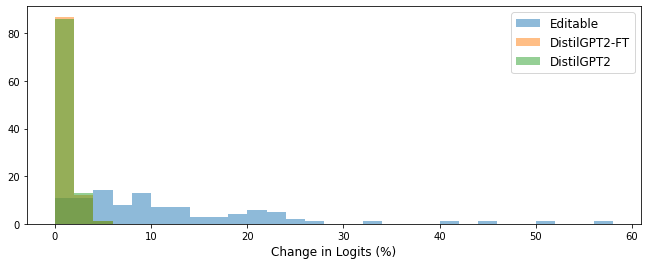

In [5]:
matplotlib.rcParams['figure.figsize'] = (11, 4)

plt.hist(
    100 * abs(edit.orig_logits - edit.new_logits) / abs(edit.orig_logits), 
    alpha=0.5, label="Editable", bins=list(range(0,60, 2)))
plt.hist(
    100 * abs(base.orig_logits - base.new_logits) / abs(base.orig_logits), 
    alpha=0.5, label="DistilGPT2-FT", bins=list(range(0,60, 2)))
plt.hist(
    100 * abs(ots.orig_logits - ots.new_logits) / abs(ots.orig_logits), 
    alpha=0.5, label="DistilGPT2", bins=list(range(0,60, 2)))
plt.xlabel("Change in Logits (%)", fontsize='large')
plt.legend(fontsize='large')
plt.show()

Plotting Logits
base_1616001947


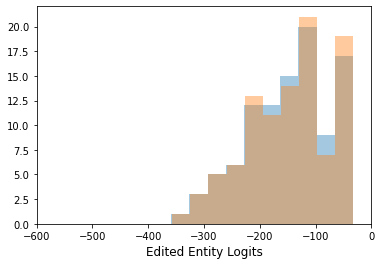

model_1615941304


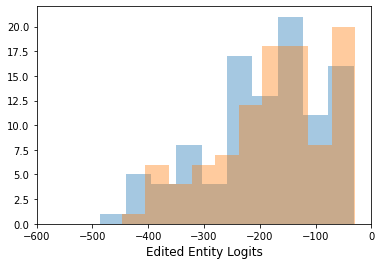

ots_1616003506


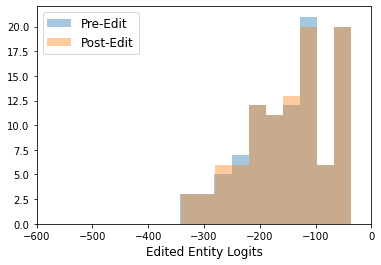

Plotting % Logit Diffs


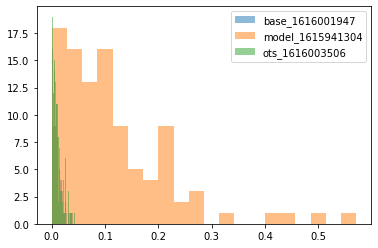

In [6]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
comps_test.plotter([-600,0])


# model_epoch0_ts10000.20210314.16.03.1615740151
## cedit=1, cloc=10, 10k steps
Notes: Model run morning of 3/14, showed best performance to date.

In [9]:
comps = ModelComps(
    model_name="model_epoch0_ts10000.20210314.16.03.1615740151",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,0.72,0.16,0.04,0.86
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,0.78,0.08,0.02,0.86
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,0.80,0.00,0.00,0.86
3,model_1615825376,5.0,89.211466,77.696777,14.820034,11.514689,0.82,0.58,0.46,0.92
4,model_1615822571,3.0,84.700869,77.696777,9.014649,7.004092,0.82,0.58,0.42,0.94
5,model_1615822038,1.0,78.251560,77.696777,0.714036,0.554783,0.84,0.56,0.40,0.92
2,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,0.82,0.16,0.04,0.88
1,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,0.84,0.08,0.00,0.88
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,0.82,0.00,0.00,0.92


Plotting Logits
base_1615827264


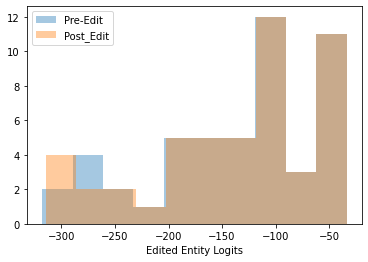

base_1615827722


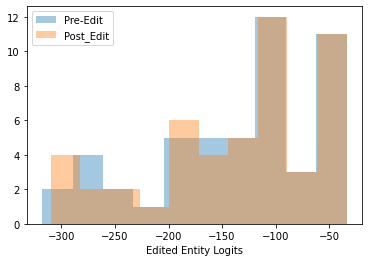

base_1615828169


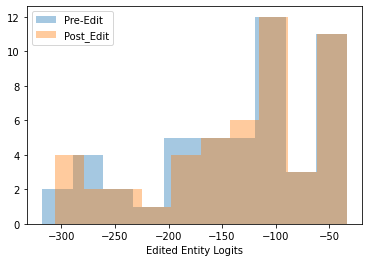

model_1615825376


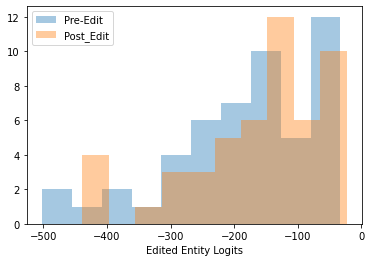

model_1615822571


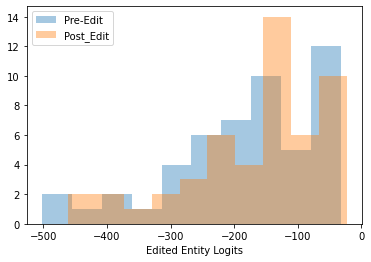

model_1615822038


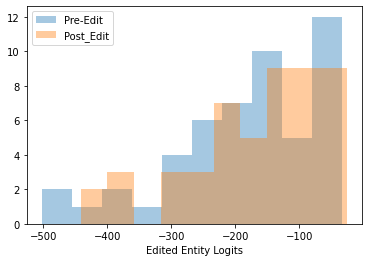

ots_1615825880


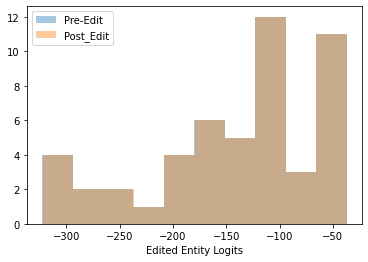

ots_1615826715


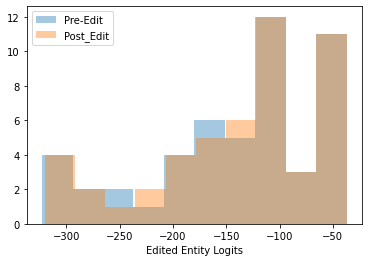

ots_1615826291


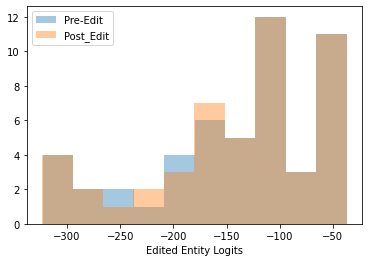

Plotting % Logit Diffs


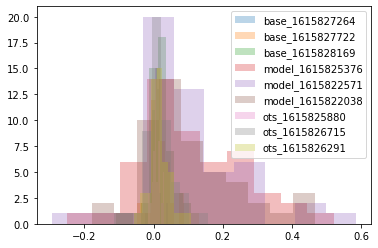

In [14]:
comps.plotter()

# model_epoch0_ts6000.20210314.16.03.1615740151
## cedit=1, cloc=10, 6k steps
Notes: same model, checking to see if evaluating an earlier checkpoint might be better. Tried with a number of checkpoints, generally worse

In [50]:
comps1 = ModelComps(
    model_name="model_epoch0_ts6000.20210314.16.03.1615740151",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps1.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,0.72,0.16,0.04,0.86
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,0.78,0.08,0.02,0.86
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,0.80,0.00,0.00,0.86
3,model_1615835384,5.0,103.998292,85.292526,21.931307,18.705765,0.86,0.70,0.52,0.90
4,model_1615834972,3.0,102.605914,85.292526,20.298834,17.313388,0.80,0.64,0.50,0.92
5,model_1615834590,1.0,85.984239,85.292526,0.810988,0.691712,0.88,0.64,0.36,0.94
2,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,0.82,0.16,0.04,0.88
1,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,0.84,0.08,0.00,0.88
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,0.82,0.00,0.00,0.92


# model_epoch0_ts18000.20210315.00.03.1615768579
## cedit=1, cloc=10, 18k steps
Notes: Tried running model for many more steps to see if additional performance could be gained

In [51]:
comps2 = ModelComps(
    model_name="model_epoch0_ts18000.20210315.00.03.1615768579",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps2.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,0.72,0.16,0.04,0.86
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,0.78,0.08,0.02,0.86
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,0.80,0.00,0.00,0.86
5,model_1615829457,5.0,87.205313,75.677681,15.232539,11.527632,0.68,0.60,0.46,0.92
3,model_1615829048,3.0,83.930170,75.677681,10.904785,8.252489,0.64,0.50,0.36,0.94
4,model_1615828661,1.0,76.592660,75.677681,1.209047,0.914979,0.66,0.52,0.40,0.94
2,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,0.82,0.16,0.04,0.88
1,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,0.84,0.08,0.00,0.88
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,0.82,0.00,0.00,0.92


Plotting Logits
base_1615827264


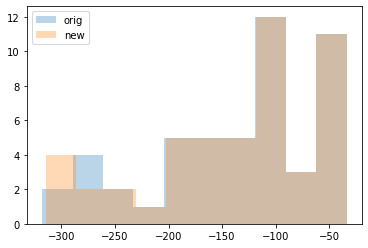

base_1615827722


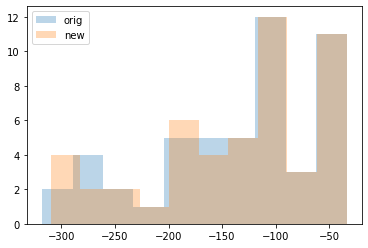

base_1615828169


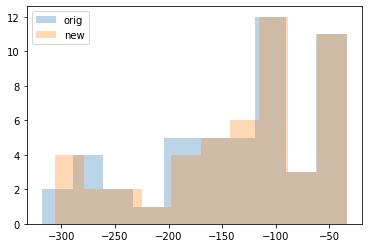

model_1615829048


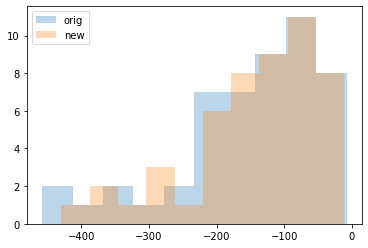

model_1615828661


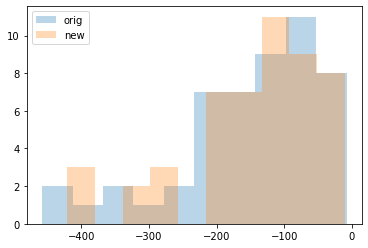

model_1615829457


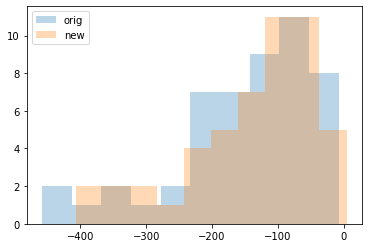

ots_1615825880


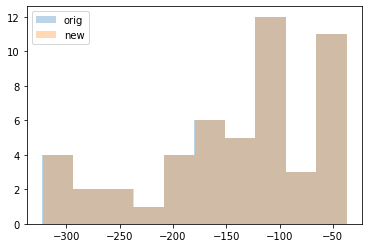

ots_1615826715


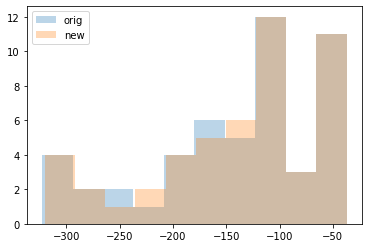

ots_1615826291


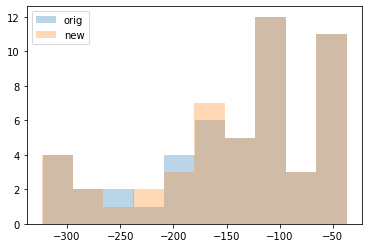

Plotting % Logit Diffs


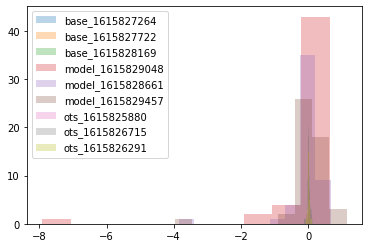

In [52]:
comps2.plotter()

# model_epoch0_ts10000.20210314.22.03.1615760445
## cedit=1, cloc=15, 10k steps


In [53]:
comps3 = ModelComps(
    model_name="model_epoch0_ts10000.20210314.22.03.1615760445",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps3.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,15.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,0.72,0.16,0.04,0.86
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,0.78,0.08,0.02,0.86
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,0.80,0.00,0.00,0.86
4,model_1615830698,5.0,92.998480,80.843575,15.035091,12.154905,0.86,0.60,0.48,0.92
3,model_1615830286,3.0,86.252994,80.843575,6.691217,5.409419,0.76,0.62,0.50,0.92
5,model_1615829897,1.0,80.696640,80.843575,-0.181751,-0.146934,0.74,0.54,0.44,0.94
2,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,0.82,0.16,0.04,0.88
1,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,0.84,0.08,0.00,0.88
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,0.82,0.00,0.00,0.92


Plotting Logits
base_1615827264


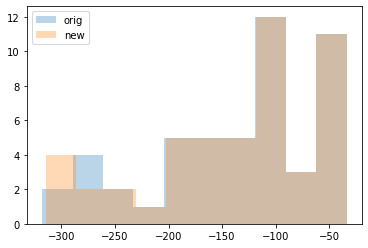

base_1615827722


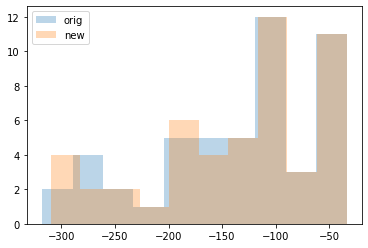

base_1615828169


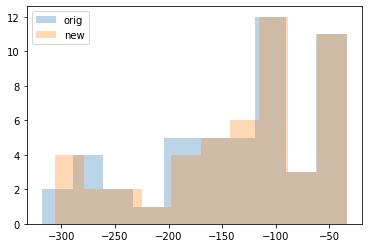

model_1615830286


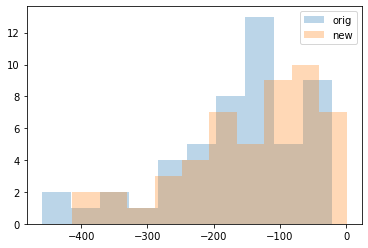

model_1615830698


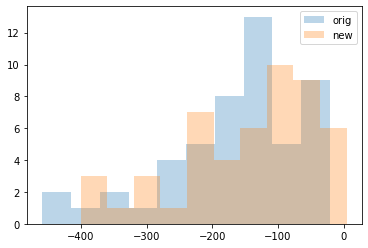

model_1615829897


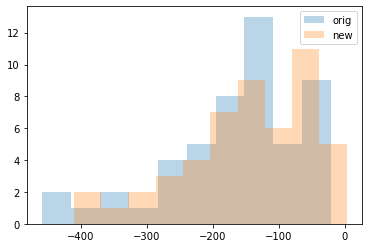

ots_1615825880


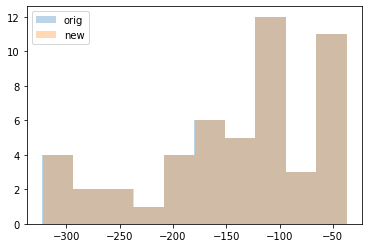

ots_1615826715


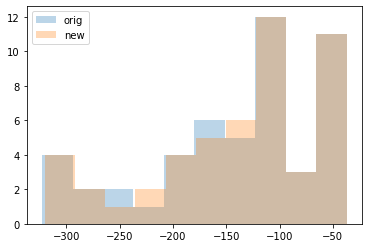

ots_1615826291


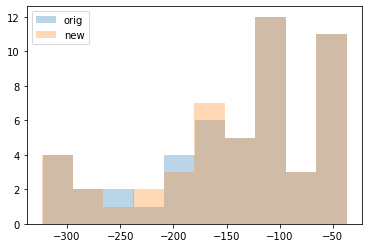

Plotting % Logit Diffs


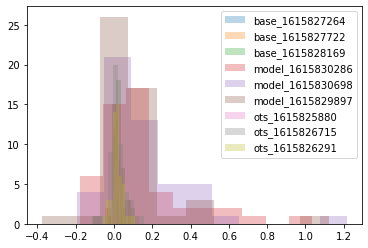

In [54]:
comps3.plotter()

# model_epoch0_ts10000.20210312.21.03.1615586239
## cedit=1, cloc=1, 10k steps
Notes: Model run Friday 3/12, first try with editing loss calculated just on the modified tokens. Has worse statistics

In [55]:
comps = ModelComps(
    model_name="model_epoch0_ts10000.20210312.21.03.1615586239",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,1.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,0.72,0.16,0.04,0.86
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,0.78,0.08,0.02,0.86
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,0.80,0.00,0.00,0.86
3,model_1615833209,5.0,184.372973,94.858231,94.366869,89.514742,0.90,0.70,0.58,0.92
5,model_1615832802,3.0,162.421238,94.858231,71.225245,67.563007,0.90,0.70,0.56,0.94
4,model_1615832420,1.0,137.337339,94.858231,44.781679,42.479109,0.86,0.72,0.56,0.92
2,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,0.82,0.16,0.04,0.88
1,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,0.84,0.08,0.00,0.88
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,0.82,0.00,0.00,0.92


In [ ]:
comps = ModelComps(
    model_name="model_epoch0_ts10000.20210312.21.03.1615586239",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

# Matrix Norm Plots

In [7]:
import utils
import copy

In [8]:
model, tokenizer = utils.loadTrainedModel("../models/model_epoch0_ts10000.20210314.16.03.1615740151")


In [102]:
model_ots, _ = utils.loadOTSModel()

In [107]:
from collections import defaultdict

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
def vizChange(model): 
    model.to(DEVICE)
    
    change_map = defaultdict(list)

    dataloader = retrieveDataloader(tokenizer, bs=1, dataset='valid', max_obs=100)
    model.train()
    for train_step, (lm_data, edit_example, ent) in enumerate(dataloader):

        edit_tokens, edit_mask = edit_example
        ent_tokens = ent[0].flatten() #1d array of vocab indexes
        ent_tokens = ent_tokens[ent_tokens != 50256]
        edit_locs = utils.locateEntityEdit(edit_tokens, ent_tokens)


        edit_labels = torch.zeros(edit_tokens.shape, dtype=torch.long) - 100
        edit_labels[:, edit_locs] = edit_tokens[:, edit_locs]
        edit_labels = edit_labels.to(DEVICE)
        edit_tokens, edit_mask = edit_tokens.to(DEVICE), edit_mask.to(DEVICE)


        inner_opt = torch.optim.SGD(model.transformer.h[-3:].parameters(), lr=1e-3)
        with higher.innerloop_ctx(
            model, 
            inner_opt, 
            copy_initial_weights=False, 
            track_higher_grads=True
            ) as (fmodel, diffopt):


            loss = fmodel(
                edit_tokens, 
                attention_mask=edit_mask,
                labels=edit_labels
            ).loss
            diffopt.step(loss)


            for (p_name, p_), fp in zip(model.named_parameters(), fmodel.parameters()):
#                 print(p_name, p_.shape)
                if p_name[:15] in [f"transformer.h.{i}" for i in range(3,6)]:
                    pct_change = torch.linalg.norm(p_ - fp)
                    change_map['run'].append(train_step)
                    change_map['layer'].append(p_name)
                    change_map['change'].append(pct_change.item())

        if train_step > 100:
            break
    return change_map

In [ ]:
import re
def rename(name):

    layerNum = name.split(".")[2]
    layerType = name.split(".")[3].replace('_', "")
    layerType = re.sub('[0-9]+', '', layerType)
    if layerType in ["attn", "mlp"]:
        layerSub = f'/{name.split(".")[4]}'
    else: layerSub = ""
    MatType = name.split(".")[-1]

    return f"Trans. {layerNum}, {layerType}{layerSub}, {MatType}"

In [111]:
change_trained = pd.DataFrame(vizChange(model))
change_trained['layer'] = change_trained.layer.apply(rename)
change_ots = pd.DataFrame(vizChange(model_ots))
change_ots['layer'] = change_ots.layer.apply(rename)

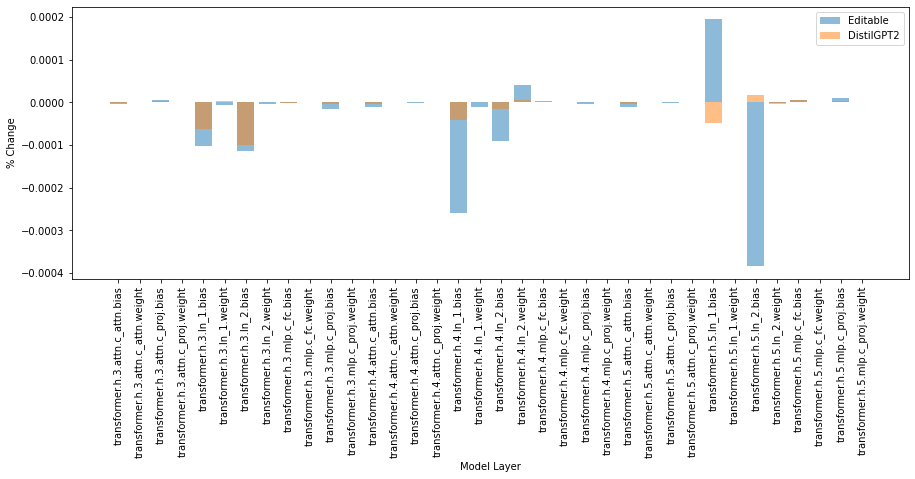

In [135]:
matplotlib.rcParams['figure.figsize'] = (15, 5)

trained_mean = (
    change_trained
    .loc[change_trained.layer.apply(lambda x: '4' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

trained_mlp = (
    change_trained
    .loc[change_trained.layer.apply(lambda x: 'mlp' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

trained_attn = (
    change_trained
    .loc[change_trained.layer.apply(lambda x: 'attn' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

ots_mean = (
    change_ots
    .loc[change_ots.layer.apply(lambda x: '4' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

ots_mlp = (
    change_ots
    .loc[change_ots.layer.apply(lambda x: 'mlp' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

ots_attn = (
    change_ots
    .loc[change_ots.layer.apply(lambda x: 'attn' in x)]
    .groupby('layer')
    .change.mean().reset_index()
)

plt.bar(trained_mlp.layer, trained_mlp.change, alpha=0.5, label='Editable')
plt.bar(ots_mlp.layer, ots_mlp.change, alpha=0.5, label='DistilGPT2')

plt.legend(fontsize='large')
plt.xticks(rotation='35', fontsize='large', ha='right')
plt.ylabel("$||\cdot||_F$ of Weight Change", fontsize='x-large')
plt.xlabel("Model Layer", fontsize='x-large')
plt.show()


plt.bar(trained_attn.layer, trained_attn.change, alpha=0.5, label='Editable')
plt.bar(ots_attn.layer, ots_attn.change, alpha=0.5, label='DistilGPT2')

plt.legend(fontsize='large')
plt.xticks(rotation='vertical', fontsize='large')
plt.ylabel("$||\cdot||_F$ of Weight Change", fontsize='large')
plt.xlabel("Model Layer", fontsize='large')
plt.show()

plt.bar(trained_mean.layer, trained_mean.change, alpha=0.5, label='Editable')
plt.bar(ots_mean.layer, ots_mean.change, alpha=0.5, label='DistilGPT2')

plt.legend(fontsize='large')
plt.xticks(rotation='vertical', fontsize='large')
plt.ylabel("$||\cdot||_F$ of Weight Change", fontsize='large')
plt.xlabel("Model Layer", fontsize='large')
plt.show()

# Self Sampled Model

In [6]:
comps = ModelComps(
    model_name="model_epoch0_ts10000.20210331.22.03.1617228585",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,epochs,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,0.5,1.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
7,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,72.000000,16.0,4.0,0.860000
8,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,78.000000,8.0,2.0,0.860000
6,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,80.000000,0.0,0.0,0.860000
4,model_1617329752,NaN,NaN,NaN,train_step NaN n_edit_steps NaN succes...,train_step NaN n_edit_steps NaN succes...,NaN,train_step NaN n_edit_steps NaN succes...,train_step NaN n_edit_steps NaN succes...,train_step NaN n_edit_steps NaN succes...
5,model_1617241067,1.0,50.962831,50.985447,-0.044357,-0.022616,82.000000,3.0,0.0,0.850000
1,base_1617299627,1.0,49.368798,49.353867,0.030253,0.014931,46.153846,0.0,0.0,0.912088
3,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,82.000000,16.0,4.0,0.880000
2,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,84.000000,8.0,0.0,0.880000
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,82.000000,0.0,0.0,0.920000


In [7]:
comps = ModelComps(
    model_name="model_epoch0_ts10000.20210402.20.04.1617395883",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,epochs,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,1.0,1.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
6,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,72.000000,16.0,4.0,0.860000
7,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,78.000000,8.0,2.0,0.860000
5,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,80.000000,0.0,0.0,0.860000
4,model_1617404140,1.0,61.052366,60.633606,0.690640,0.418760,57.142857,0.0,0.0,0.714286
1,base_1617299627,1.0,49.368798,49.353867,0.030253,0.014931,46.153846,0.0,0.0,0.912088
3,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,82.000000,16.0,4.0,0.880000
2,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,84.000000,8.0,0.0,0.880000
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,82.000000,0.0,0.0,0.920000


In [10]:
comps = ModelComps(
    model_name="model_epoch0_ts8000.20210401.21.04.1617312405",
    base_name="gpt2_epoch0_ts10000.20210310.18.03.1615401990",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,epochs,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
5,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,72.000000,16.0,4.0,0.860000
6,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,78.000000,8.0,2.0,0.860000
4,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,80.000000,0.0,0.0,0.860000
1,base_1617299627,1.0,49.368798,49.353867,0.030253,0.014931,46.153846,0.0,0.0,0.912088
3,base_1615828169,5.0,50.140138,49.353867,1.593129,0.786271,82.000000,16.0,4.0,0.880000
2,base_1615827722,3.0,49.605848,49.353867,0.510561,0.251981,84.000000,8.0,0.0,0.880000
0,base_1615827264,1.0,49.365100,49.353867,0.022761,0.011233,82.000000,0.0,0.0,0.920000


In [10]:
comps = ModelComps(
    model_name="editable_epoch0_ts10000.20210412.12.04.1618256226",
    base_name="gpt2_epoch0_ts10000.20210408.09.04.1617899457",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,epochs,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,0.5,5.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
8,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,72.0,16.0,4.0,0.86
6,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,78.0,8.0,2.0,0.86
7,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,80.0,0.0,0.0,0.86
5,model_1618332554,3.0,38.728669,38.728638,0.000080,0.000031,75.0,0.0,0.0,0.79
4,model_1618269833,1.0,38.728517,38.728638,-0.000313,-0.000121,76.0,0.0,0.0,0.80
3,model_1618263251,1.0,38.751482,38.728638,0.058987,0.022845,73.0,0.0,0.0,0.95
0,base_1618332574,3.0,32.865040,32.862228,0.008557,0.002812,64.0,0.0,0.0,0.87
1,base_1618277028,1.0,32.862154,32.862228,-0.000226,-0.000074,64.0,0.0,0.0,0.84
2,base_1618004708,1.0,32.862900,32.862228,0.002044,0.000672,52.0,1.0,1.0,0.99


In [9]:
comps = ModelComps(
    model_name="editable_epoch0_ts10000.20210412.11.04.1618251986",
    base_name="gpt2_epoch0_ts10000.20210408.09.04.1617899457",
    archive=False
)

comps.summary()

Model Parameters:


,inner_lr,outer_lr,epochs,n_edit_steps,cedit,cloc
0,0.001,0.00001,1.0,1.0,1.0,10.0


Success Metrics


,model,edit_steps,mean_new_ppl,mean_orig_ppl,pct_ppl_dd,gross_ppl_dd,new_logits_higher,new_logits_higher05,new_logits_higher10,success_by_probs
4,ots_1615826715,5.0,92.249127,90.703072,1.704523,1.546055,72.0,16.0,4.0,0.86
2,ots_1615826291,3.0,91.357340,90.703072,0.721330,0.654268,78.0,8.0,2.0,0.86
3,ots_1615825880,1.0,90.831759,90.703072,0.141878,0.128688,80.0,0.0,0.0,0.86
0,base_1618277028,1.0,32.862154,32.862228,-0.000226,-0.000074,64.0,0.0,0.0,0.84
1,base_1618004708,1.0,32.862900,32.862228,0.002044,0.000672,52.0,1.0,1.0,0.99
